In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [4]:
project_path = "/content/drive/My Drive/NLP_projects/"

# Part A

**PROJECT OBJECTIVE:** To build a NLP classifier which can use input text parameters to determine the label/s of the blog. Specific to this case
study, you can consider the text of the blog: ‘text’ feature as independent variable and ‘topic’ as dependent variable.

1. Read and Analyse Dataset. [5 Marks]

In [5]:
# A. Clearly write outcome of data analysis(Minimum 2 points) [2 Marks]


images_zip_path = project_path + "blogs.zip"

from zipfile import ZipFile

with ZipFile(images_zip_path, 'r') as z:
  z.extractall()

In [6]:
blog_df = pd.read_csv('blogtext.csv')
blog_df = blog_df.sample(n=10000, ignore_index=True)    #Taking subset of 10,000 rows so that the system does not crash.
print(blog_df.head())

        id  gender  age      topic     sign             date  \
0  1627914  female   38  Education  Scorpio     03,July,2003   
1  3693954  female   14   Internet      Leo     20,June,2004   
2  3720867    male   37       Arts   Gemini     06,July,2004   
3   180519  female   23     indUnk   Cancer  11,October,2001   
4  3750778  female   17    Student    Aries     11,July,2004   

                                                text  
0                   My purpose for setting up thi...  
1                   I don't think I've posted any...  
2               This has come to be my favorite t...  
3         ah, i'm such a fool. perhaps it would b...  
4             J     Joyous       I     Insane    ...  


In [7]:
blog_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      10000 non-null  int64 
 1   gender  10000 non-null  object
 2   age     10000 non-null  int64 
 3   topic   10000 non-null  object
 4   sign    10000 non-null  object
 5   date    10000 non-null  object
 6   text    10000 non-null  object
dtypes: int64(2), object(5)
memory usage: 547.0+ KB


In [8]:
blog_df['gender'].value_counts()

male      5026
female    4974
Name: gender, dtype: int64

In [9]:
blog_df['topic'].nunique()

40

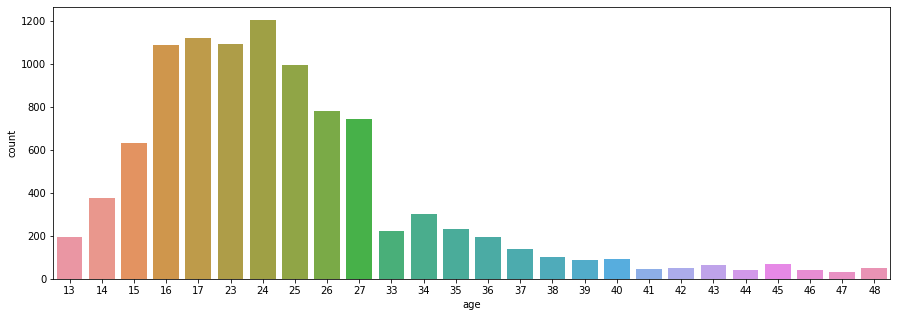

In [10]:
 plt.figure(figsize=(15,5))
 sns.countplot(x='age',data=blog_df)

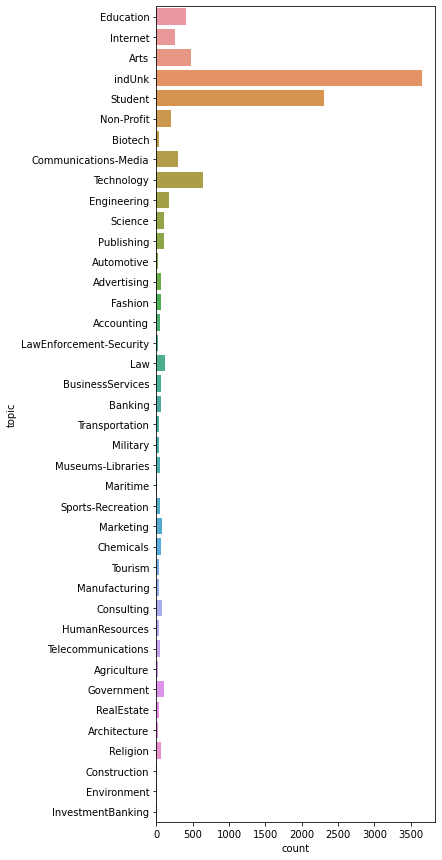

In [11]:
 plt.figure(figsize=(5,15))
sns.countplot(y='topic',data=blog_df)

Insights: 


*   There are blogs on 40 topics.
*   There are slightly less female bloggers than male.
*   Most bloggers are in the age group 15-27
*   Most of the blogs are about a handful of topics which makes the dataset highly skewed.









 



In [12]:
# B. Clean the Structured Data [3 Marks]
#  i. Missing value analysis and imputation. [1 Marks]
blog_df.isnull().sum()

id        0
gender    0
age       0
topic     0
sign      0
date      0
text      0
dtype: int64

There are no missing values in the dataset

In [13]:
#  ii. Eliminate Non-English textual data. [2 Marks]
!pip install langdetect
from langdetect import detect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [14]:
def detect_english(text):
  try:
    return detect(text) == 'en'
  except:
    return False

In [15]:
blog_en = blog_df[blog_df['text'].apply(detect_english)]

In [16]:
blog_en.shape

(9555, 7)

In [17]:
blog_en.topic.value_counts()

indUnk                     3505
Student                    2199
Technology                  610
Arts                        461
Education                   388
Communications-Media        287
Internet                    242
Non-Profit                  197
Engineering                 168
Publishing                  109
Law                         105
Government                  105
Science                      95
Consulting                   82
Marketing                    72
Advertising                  65
Banking                      64
Fashion                      64
BusinessServices             63
Religion                     63
Chemicals                    62
Museums-Libraries            49
Telecommunications           46
Accounting                   44
Sports-Recreation            43
HumanResources               42
Military                     41
RealEstate                   40
Transportation               34
Manufacturing                30
Tourism                      29
Biotech 

In [18]:
#Remove infrequent topics
counts = blog_en['topic'].value_counts()

blog_en = blog_en[blog_en['topic'].isin(counts[counts > 100].index)]
blog_en['topic'].value_counts()

indUnk                  3505
Student                 2199
Technology               610
Arts                     461
Education                388
Communications-Media     287
Internet                 242
Non-Profit               197
Engineering              168
Publishing               109
Law                      105
Government               105
Name: topic, dtype: int64

In [19]:
blog_en.shape

(8376, 7)

2. Preprocess unstructured data to make it consumable for model training. [5 Marks]

In [20]:
# A. Eliminate All special Characters and Numbers [2 Marks]
blog_en.text = blog_en.text.apply(lambda x: re.sub('[^A-Za-z]+', ' ', x))

In [21]:
blog_en.text.head(10)

0     My purpose for setting up this site is to sha...
1     I don t think I ve posted anything about Harr...
2     This has come to be my favorite time of year ...
3     ah i m such a fool perhaps it would be best i...
4     J Joyous I Insane L Light L Luscious Name Use...
5                glad it s all good cool anna krystle 
6     subject is another eric quote but i might as ...
7     heylo so saturday manda jenn mar kevin and jo...
8     My co hort in crime urlLink roar not lion mad...
9     I am so excited I just made a bid on a pair o...
Name: text, dtype: object

In [22]:
# B. Lowercase all textual data [1 Marks]
blog_en.text = blog_en.text.apply(lambda s: s.lower())
blog_en.text.head(10)

0     my purpose for setting up this site is to sha...
1     i don t think i ve posted anything about harr...
2     this has come to be my favorite time of year ...
3     ah i m such a fool perhaps it would be best i...
4     j joyous i insane l light l luscious name use...
5                glad it s all good cool anna krystle 
6     subject is another eric quote but i might as ...
7     heylo so saturday manda jenn mar kevin and jo...
8     my co hort in crime urllink roar not lion mad...
9     i am so excited i just made a bid on a pair o...
Name: text, dtype: object

In [23]:
blog_en.text = blog_en.text.str.replace('urllink', "") #Removing keyword urllink

In [24]:
# C. Remove all Stopwords [1 Marks]
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords=set(stopwords.words('english'))
blog_en['text'] = blog_en['text'].apply(lambda k: ' '.join([words for words in k.split() if words not in stopwords]) )

blog_en.text.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0    purpose setting site share things written thou...
1    think posted anything harry potter love harry ...
2    come favorite time year get work new york rena...
3    ah fool perhaps would best learned accept mayb...
4    j joyous insane l light l luscious name userna...
Name: text, dtype: object

In [25]:
# D. Remove all extra white spaces [1 Marks]
blog_en.text = blog_en.text.apply(lambda s: s.strip())

3. Build a base Classification model [8 Marks]

In [26]:
# A. Create dependent and independent variables [2 Marks] Hint: Treat ‘topic’ as a Target variable.
X = blog_en.text
y= blog_en.topic

In [27]:
X.head()

0    purpose setting site share things written thou...
1    think posted anything harry potter love harry ...
2    come favorite time year get work new york rena...
3    ah fool perhaps would best learned accept mayb...
4    j joyous insane l light l luscious name userna...
Name: text, dtype: object

In [28]:
y.head()

0    Education
1     Internet
2         Arts
3       indUnk
4      Student
Name: topic, dtype: object

In [29]:
# B. Split data into train and test. [1 Marks]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42,test_size = 0.2)

In [30]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(6700,)
(6700,)
(1676,)
(1676,)


In [31]:
# C. Vectorize data using any one vectorizer. [2 Marks]
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(ngram_range=(1,2))
X_train_t = tfidf.fit_transform(X_train)  #X_train_t is vectorized with Tf-idf vectorizer
X_test_t = tfidf.transform(X_test)

In [32]:
X_train_t.shape

(6700, 546790)

In [33]:
# D. Build a base model for Supervised Learning - Classification. [2 Marks]

from sklearn.tree import DecisionTreeClassifier
model_1 = DecisionTreeClassifier(random_state=0)
model_1.fit(X_train_t, y_train)
pred_1 = model_1.predict(X_test_t)

In [34]:
# E. Clearly print Performance Metrics. [1 Marks]
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score

def print_evaluation_scores(y_val, predicted):
    print('Accuracy score: ', accuracy_score(y_val, predicted))
    print('F1 score: ', f1_score(y_val, predicted, average='weighted'))
    print('Average precision score: ', precision_score(y_val, predicted,  average='weighted'))
    print('Average recall score: ', recall_score(y_val, predicted, average='weighted'))
    

In [35]:
print_evaluation_scores(y_test,pred_1)

Accuracy score:  0.31742243436754175
F1 score:  0.3073658263179955
Average precision score:  0.299934160874046
Average recall score:  0.31742243436754175


4. Improve Performance of model. [14 Marks]

In [36]:
# A. Experiment with other vectorisers. [4 Marks]
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(binary=True, ngram_range=(1, 3))
X_train_c = vectorizer.fit_transform(X_train)     #X_train_c is vectorized with Count Vectorizer
X_test_c = vectorizer.transform(X_test)
X_train_c, X_test_c

(<6700x1186983 sparse matrix of type '<class 'numpy.int64'>'
 	with 1801025 stored elements in Compressed Sparse Row format>,
 <1676x1186983 sparse matrix of type '<class 'numpy.int64'>'
 	with 175903 stored elements in Compressed Sparse Row format>)

In [37]:
from sklearn.feature_selection import SelectKBest, chi2

ch2 = SelectKBest(chi2, k=5000)
X_train_b = ch2.fit_transform(X_train_c, y_train)     #X_train_b has the best features from X_train_c
X_test_b = ch2.transform(X_test_c)

X_train_b, X_test_b

(<6700x5000 sparse matrix of type '<class 'numpy.int64'>'
 	with 5740 stored elements in Compressed Sparse Row format>,
 <1676x5000 sparse matrix of type '<class 'numpy.int64'>'
 	with 262 stored elements in Compressed Sparse Row format>)

In [38]:
# B. Build classifier Models using other algorithms than base model. [4 Marks]
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
model_2 = MultinomialNB()
model_2.fit(X_train_b, y_train)
pred_2 = model_2.predict(X_test_b)

print("Multinomial metrics:")
print_evaluation_scores(y_test, pred_2)

Multinomial metrics:
Accuracy score:  0.42422434367541767
F1 score:  0.2784613348235213
Average precision score:  0.33764521573227835
Average recall score:  0.42422434367541767


In [39]:
## Bernoulli model
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score
model_3 = BernoulliNB()
model_3.fit(X_train_b, y_train)
pred_3 = model_3.predict(X_test_b)

print("Bernoulli model metrics:")
print_evaluation_scores(y_test, pred_3)

Bernoulli model metrics:
Accuracy score:  0.4230310262529833
F1 score:  0.25261657766880463
Average precision score:  0.23280337471024026
Average recall score:  0.4230310262529833


In [40]:
# C. Tune Parameters/Hyperparameters of the model/s. [4 Marks]
# D. Clearly print Performance Metrics. [2 Marks]
## RandomForest model
from sklearn.ensemble import RandomForestClassifier
model_4=RandomForestClassifier(max_depth=100, n_estimators=100)
model_4.fit(X_train_t, y_train)
pred_4 = model_4.predict(X_test_t)

print("Random Forest model for tfidf vectorizer:")
print_evaluation_scores(y_test,pred_4)

Random Forest model for tfidf vectorizer:
Accuracy score:  0.43973747016706444
F1 score:  0.3131774991383213
Average precision score:  0.33328590862172947
Average recall score:  0.43973747016706444


In [41]:
from sklearn.ensemble import RandomForestClassifier
model_5=RandomForestClassifier(max_depth=100, n_estimators=100)
model_5.fit(X_train_b, y_train)
pred_5 = model_5.predict(X_test_b)

print("Random Forest classifier for Count Vectorizer:")
print_evaluation_scores(y_test, pred_5)

Random Forest classifier for Count Vectorizer:
Accuracy score:  0.4152744630071599
F1 score:  0.2809618746179181
Average precision score:  0.3301515986221898
Average recall score:  0.4152744630071599


In [42]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 150, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [100,150]
# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [43]:
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(param_grid)

{'n_estimators': [100, 105, 111, 116, 122, 127, 133, 138, 144, 150], 'max_features': ['auto', 'sqrt'], 'max_depth': [100, 150], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}


In [44]:
from sklearn.model_selection import RandomizedSearchCV

rf_Model = RandomForestClassifier()
rf_RandomGrid = RandomizedSearchCV(estimator = rf_Model, param_distributions = param_grid, cv = 3, verbose=1, n_jobs = 4)

In [45]:
rf_RandomGrid.fit(X_train_t, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=4,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [100, 150],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [100, 105, 111, 116,
                                                         122, 127, 133, 138,
                                                         144, 150]},
                   verbose=1)

In [46]:
rf_RandomGrid.best_params_

{'n_estimators': 116,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 100,
 'bootstrap': False}

In [47]:
print (f'Train Accuracy - : {rf_RandomGrid.score(X_train_t,y_train):.3f}')
print (f'Test Accuracy - : {rf_RandomGrid.score(X_test_t,y_test):.3f}')

Train Accuracy - : 0.813
Test Accuracy - : 0.431


## 5. Share insights on relative performance comparison [8 Marks]

***A. Which vectorizer performed better? Probable reason?.
[2 Marks]***

Both the vectorizers give similar accuracy. Tf-ifd gives slightly better F1 score. Since it gives importance to words specific the individual documents.

***B. Which model outperformed? Probable reason? [2 Marks]***

Random forest classifier is giving the best results. But it's performace is only slightly better than the rest.

***C. Which parameter/hyperparameter significantly helped to improve performance?Probable reason?. [2 Marks]***
In Random Forest classifier the n_estimator affects the results.

***D. According to you, which performance metric should be given most importance, why?. [2 Marks]***

Accuracy and F1 score should be given most importance as we are trying to predict labels.

The dataset should contain similar number of blogs from each topic. Imbalanced dataset with too many categories gives bad performance.


# Part B

PROJECT OBJECTIVE: Design a python based interactive semi - rule based chatbot which can do the following:

Input the corpus

Perform data pre-processing on corpus

Text case [upper or lower] handling 

Tokenisation

Stemming

Generate BOW [Bag of Words]

Generate one hot encoding for the target column

Design a neural network to classify the words with TAGS as target outputs

Design a function to speak the output text

Design a function to listen to the user and convert the spoken words into text

Design a chat utility as a function to interact with the user till they call a “quit”

Run the chat utility function.

In [48]:
# Input the corpus
import json
import numpy
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords=set(stopwords.words('english'))
with open('GL+Bot.json') as file:
  Corpus = json.load(file)

  print(Corpus)

{'intents': [{'tag': 'Intro', 'patterns': ['hi', 'how are you', 'is anyone there', 'hello', 'whats up', 'hey', 'yo', 'listen', 'please help me', 'i am learner from', 'i belong to', 'aiml batch', 'aifl batch', 'i am from', 'my pm is', 'blended', 'online', 'i am from', 'hey ya', 'talking to you for first time'], 'responses': ['Hello! how can i help you ?', 'My name is Siri. PLease tell me your query', 'Hi! Hope you are doing well', 'Hello user! I am Siri', 'Siri is here to assist you.'], 'context_set': ''}, {'tag': 'Exit', 'patterns': ['thank you', 'thanks', 'cya', 'see you', 'later', 'see you later', 'goodbye', 'i am leaving', 'have a Good day', 'you helped me', 'thanks a lot', 'thanks a ton', 'you are the best', 'great help', 'too good', 'you are a good learning buddy'], 'responses': ['I hope I was able to assist you, Good Bye', 'Thank you for sharing your query', 'Happy to help!', 'No problems'], 'context_set': ''}, {'tag': 'Olympus', 'patterns': ['olympus', 'explain me how olympus wo

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [49]:
# Perform Data preprocessing on corpus
# Tokenisation
nltk.download('punkt')

W = [] # Tokens
L = [] # Identified Tags or Labels
doc_x = [] # Tokenised word
doc_y = [] # Tags or Labels

for intent in Corpus['intents']:
  for pattern in intent['patterns']:
    w_temp = nltk.word_tokenize(pattern)
    W.extend(w_temp)
    doc_x.append(w_temp)
    doc_y.append(intent["tag"])

  #Add the missing tag if any
  if intent['tag'] not in L:
    L.append(intent['tag'])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [50]:
# Stemming
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
W = [stemmer.stem(w.lower()) for w in W if w !="?"]
W = sorted(list(set(W)))
L = sorted(L)

In [51]:
# Bag of words
Train = [] #Training data for NN
Target = [] # Target data for NN

out_empty = [0 for _ in range(len(L))]

# Loop to create bag of words and put the frequency count in each word 
for x, doc in enumerate(doc_x):
  bag=[]

  w_temp = [stemmer.stem(w.lower()) for w in doc]

  for w in W:
    if w in w_temp:
      bag.append(1)
    else:
      bag.append(0)

  output_row = out_empty[:]
  output_row[L.index(doc_y[x])]=1

  Train.append(bag)
  Target.append(output_row)

Train = numpy.array(Train)
Target = numpy.array(Target)

In [52]:
Target[0]

array([0, 0, 0, 1, 0, 0, 0, 0, 0])

In [53]:
def bag_of_words(s, words):
    bag = [0 for _ in range(len(words))]
    
    s_words = nltk.word_tokenize(s)
    s_words = [stemmer.stem(word.lower()) for word in s_words]
    
    for se in s_words:
        for i, w in enumerate(words):
            if w == se:
                bag[i] = 1
                
    return numpy.array(bag)

In [54]:
# Code for Neural Network classifier
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout

model = Sequential()
model.add(Dense(64, input_dim=len(Train[0]), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(Target[0]),  activation='softmax'))

model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="sgd")
model.fit(x=Train, y=Target, epochs=1000, batch_size=16, verbose=0)


In [55]:
# Text chat utility fuction
import random
def chat():
  print("Please type in the box (type:stop to quit)")
  print("If answer is not right(type: *)")
  while True:
    inp = input("\n\n You: ")
    if inp.lower()=="*":
      print("Siri:Please rephrase your question and try again")
    if inp.lower()=="quit":
      break
    inp=inp.lower()
    results = model.predict(np.array([bag_of_words(inp,W)]))
    results_index = numpy.argmax(results)
    #print(results)
    tag = L[results_index]
    #print(tag)

    for tg in Corpus["intents"]:
      if tg['tag']==tag:
        responses=tg['responses']

    print("Siri:",random.choice(responses))

In [ ]:
chat()

Please type in the box (type:stop to quit)
If answer is not right(type: *)


 You: hi
Siri: Siri is here to assist you.


 You: hello
Siri: Hello! how can i help you ?


 You: eopch
Siri: My name is Siri. PLease tell me your query


 You: i dont understant ml
Siri: Please refer to the videos for Supervised Learning
